In [1]:
from mp_api.client import MPRester
my_api_key = "pdDir9sfmf4JPMKDSJzF8W7ZJ7CyqYHE"

/home/holywater2/.conda/envs/infGCN/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# https://docs.materialsproject.org/downloading-data/using-the-api/examples
# https://materialsproject.github.io/pyrho/

In [2]:
from mp_api.client import MPRester

with MPRester(my_api_key) as mpr:
    chgcar = mpr.get_charge_density_from_material_id("mp-48")

Retrieving TaskDoc documents: 100%|██████████| 8/8 [00:00<00:00, 99568.05it/s]


In [3]:
chgcar.structure

Structure Summary
Lattice
    abc : 2.4677242827325747 2.4677242827325747 8.685038
 angles : 90.0 90.0 120.00000758003493
 volume : 45.80317575176706
      A : 1.233862 -2.137112 0.0
      B : 1.233862 2.137112 0.0
      C : 0.0 0.0 8.685038
    pbc : True True True
PeriodicSite: C (0.0, 0.0, 6.514) [0.0, 0.0, 0.75]
PeriodicSite: C (0.0, 0.0, 2.171) [0.0, 0.0, 0.25]
PeriodicSite: C (1.234, 0.7124, 6.514) [0.3333, 0.6667, 0.75]
PeriodicSite: C (1.234, -0.7124, 2.171) [0.6667, 0.3333, 0.25]

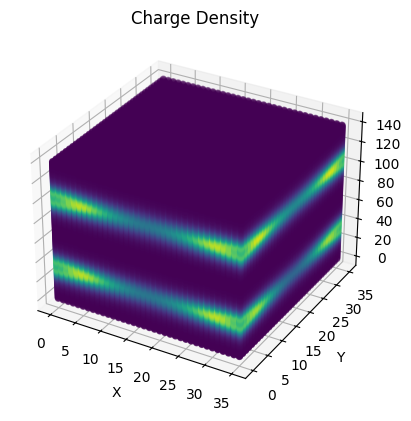

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming chgcar is the charge density data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the grid coordinates
x = range(chgcar.dim[0])
y = range(chgcar.dim[1])
z = range(chgcar.dim[2])
X, Y, Z = np.meshgrid(x, y, z)

# Plot the charge density
ax.scatter(X, Y, Z, c=chgcar.data["total"])

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Charge Density')

# Show the plot
plt.show()


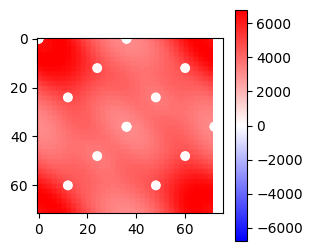

In [69]:
import PIL
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap, CenteredNorm
import matplotlib.colors as colors
from torchvision.transforms import ToTensor


cur_cell = chgcar
supercell = cur_cell.structure * [2, 2, 2]

density = cur_cell.data["total"]
superdensity = density.repeat(2, axis=0).repeat(2, axis=1).repeat(2, axis=2)
cell = supercell.lattice.matrix
grid_shape = np.array(cur_cell.dim) * 2
grid_cell = cell / grid_shape
inv = np.linalg.inv(grid_cell)

dim = -1
atom_coord = supercell.cart_coords
atom_coord = atom_coord @ inv
atom_type = supercell.atomic_numbers
cmap = ListedColormap(['grey', 'white', 'red', 'blue', 'green', 'white'])
norm = CenteredNorm

plt.figure(figsize=(3, 3))
plt.imshow(superdensity.sum(dim), cmap='bwr',norm=colors.CenteredNorm())
plt.colorbar()
if atom_type is not None:
    idx = [i for i in range(3) if i != dim % 3]
    coord = atom_coord
    color = cmap(atom_type)
    plt.scatter(coord[:, idx[1]], coord[:, idx[0]], c=color, alpha=0.8)


In [68]:
superdensity.sum(dim).shape

(72, 72)

In [50]:
chgcar

In [22]:
supercell = chgcar.structure * [2, 2, 2]

In [76]:
chgcar.structure

Structure Summary
Lattice
    abc : 2.4677242827325747 2.4677242827325747 8.685038
 angles : 90.0 90.0 120.00000758003493
 volume : 45.80317575176706
      A : 1.233862 -2.137112 0.0
      B : 1.233862 2.137112 0.0
      C : 0.0 0.0 8.685038
    pbc : True True True
PeriodicSite: C (0.0, 0.0, 6.514) [0.0, 0.0, 0.75]
PeriodicSite: C (0.0, 0.0, 2.171) [0.0, 0.0, 0.25]
PeriodicSite: C (1.234, 0.7124, 6.514) [0.3333, 0.6667, 0.75]
PeriodicSite: C (1.234, -0.7124, 2.171) [0.6667, 0.3333, 0.25]

In [78]:
chgcar.structure.lattice.matrix

array([[ 1.233862, -2.137112,  0.      ],
       [ 1.233862,  2.137112,  0.      ],
       [ 0.      ,  0.      ,  8.685038]])

In [82]:
lm = chgcar.structure.lattice.matrix

In [162]:
mesh = np.meshgrid(np.linspace(0,1,36),np.linspace(0,1,36))

In [164]:
mesh[0].reshape(36,36,1)*lm[0]

array([[[ 0.        , -0.        ,  0.        ],
        [ 0.0352532 , -0.06106034,  0.        ],
        [ 0.0705064 , -0.12212069,  0.        ],
        ...,
        [ 1.1633556 , -2.01499131,  0.        ],
        [ 1.1986088 , -2.07605166,  0.        ],
        [ 1.233862  , -2.137112  ,  0.        ]],

       [[ 0.        , -0.        ,  0.        ],
        [ 0.0352532 , -0.06106034,  0.        ],
        [ 0.0705064 , -0.12212069,  0.        ],
        ...,
        [ 1.1633556 , -2.01499131,  0.        ],
        [ 1.1986088 , -2.07605166,  0.        ],
        [ 1.233862  , -2.137112  ,  0.        ]],

       [[ 0.        , -0.        ,  0.        ],
        [ 0.0352532 , -0.06106034,  0.        ],
        [ 0.0705064 , -0.12212069,  0.        ],
        ...,
        [ 1.1633556 , -2.01499131,  0.        ],
        [ 1.1986088 , -2.07605166,  0.        ],
        [ 1.233862  , -2.137112  ,  0.        ]],

       ...,

       [[ 0.        , -0.        ,  0.        ],
        [ 0

In [165]:
mesh[1].reshape(36,36,1)*lm[1]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.0352532 , 0.06106034, 0.        ],
        [0.0352532 , 0.06106034, 0.        ],
        [0.0352532 , 0.06106034, 0.        ],
        ...,
        [0.0352532 , 0.06106034, 0.        ],
        [0.0352532 , 0.06106034, 0.        ],
        [0.0352532 , 0.06106034, 0.        ]],

       [[0.0705064 , 0.12212069, 0.        ],
        [0.0705064 , 0.12212069, 0.        ],
        [0.0705064 , 0.12212069, 0.        ],
        ...,
        [0.0705064 , 0.12212069, 0.        ],
        [0.0705064 , 0.12212069, 0.        ],
        [0.0705064 , 0.12212069, 0.        ]],

       ...,

       [[1.1633556 , 2.01499131, 0.        ],
        [1.1633556 , 2.01499131, 0.        ],
        [1.1633556 , 2

In [193]:
new_mesh[35,0]

array([1.233862, 2.137112, 0.      ])

In [183]:
mesh[0]

array([[0.        , 0.0685479 , 0.13709579, ..., 2.26208059, 2.33062849,
        2.39917639],
       [0.        , 0.0685479 , 0.13709579, ..., 2.26208059, 2.33062849,
        2.39917639],
       [0.        , 0.0685479 , 0.13709579, ..., 2.26208059, 2.33062849,
        2.39917639],
       ...,
       [0.        , 0.0685479 , 0.13709579, ..., 2.26208059, 2.33062849,
        2.39917639],
       [0.        , 0.0685479 , 0.13709579, ..., 2.26208059, 2.33062849,
        2.39917639],
       [0.        , 0.0685479 , 0.13709579, ..., 2.26208059, 2.33062849,
        2.39917639]])

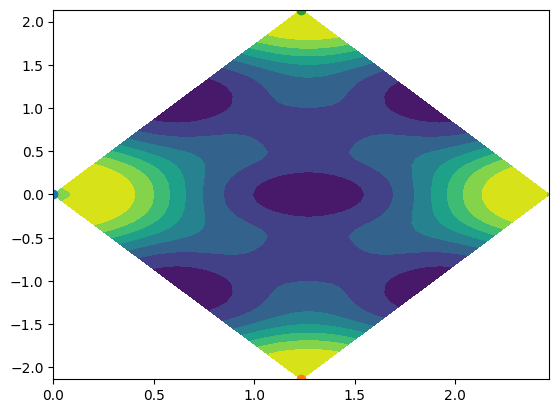

In [194]:
# mesh = chgcar.get_axis_grid(0), chgcar.get_axis_grid(1)
mesh = np.meshgrid(np.linspace(0,1,36),np.linspace(0,1,36))
# mesh = np.meshgrid(*mesh)
new_mesh = np.zeros((36,36,3))

new_mesh[:,:,] = mesh[0].reshape(36,36,1)*lm[0] + mesh[1].reshape(36,36,1)*lm[1]


plt.contourf(new_mesh[:,:,0],
               new_mesh[:,:,1],
               density.sum(-1))
plt.scatter(0,0)
plt.scatter(1.23,-2.137)
plt.scatter(1.23,2.137)


In [186]:
mesh[0].shape

(1296, 1296)

In [187]:
np.linspace(0,1,36)

array([0.        , 0.02857143, 0.05714286, 0.08571429, 0.11428571,
       0.14285714, 0.17142857, 0.2       , 0.22857143, 0.25714286,
       0.28571429, 0.31428571, 0.34285714, 0.37142857, 0.4       ,
       0.42857143, 0.45714286, 0.48571429, 0.51428571, 0.54285714,
       0.57142857, 0.6       , 0.62857143, 0.65714286, 0.68571429,
       0.71428571, 0.74285714, 0.77142857, 0.8       , 0.82857143,
       0.85714286, 0.88571429, 0.91428571, 0.94285714, 0.97142857,
       1.        ])

In [153]:
chgcar.structure

Structure Summary
Lattice
    abc : 2.4677242827325747 2.4677242827325747 8.685038
 angles : 90.0 90.0 120.00000758003493
 volume : 45.80317575176706
      A : 1.233862 -2.137112 0.0
      B : 1.233862 2.137112 0.0
      C : 0.0 0.0 8.685038
    pbc : True True True
PeriodicSite: C (0.0, 0.0, 6.514) [0.0, 0.0, 0.75]
PeriodicSite: C (0.0, 0.0, 2.171) [0.0, 0.0, 0.25]
PeriodicSite: C (1.234, 0.7124, 6.514) [0.3333, 0.6667, 0.75]
PeriodicSite: C (1.234, -0.7124, 2.171) [0.6667, 0.3333, 0.25]

In [215]:
# super_axis1 = np.array(chgcar.get_axis_grid(0))
# super_axis2 = np.array(chgcar.get_axis_grid(1))
# super_axis1 = np.concatenate((super_axis1, super_axis1 + super_axis1[-1]))
# super_axis2 = np.concatenate((super_axis2, super_axis2 + super_axis2[-1]))
mul = 9
super_axis1 = np.linspace(0,1,36*mul)
super_axis2 = np.linspace(0,1,36*mul)
super_mesh = np.meshgrid(super_axis1, super_axis2)
super_new_mesh = np.zeros((36*mul,36*mul,3))
super_new_mesh[:,:,] = super_mesh[0].reshape(36*mul,36*mul,1)*lm[0].reshape(1,1,3) + super_mesh[1].reshape(36*mul,36*mul,1)*lm[1].reshape(1,1,3)
super_new_mesh = super_new_mesh[:,:,0:2]
super_new_mesh.shape

(324, 324, 2)

In [202]:
superdensity = np.tile(density, (mul, mul, 1))

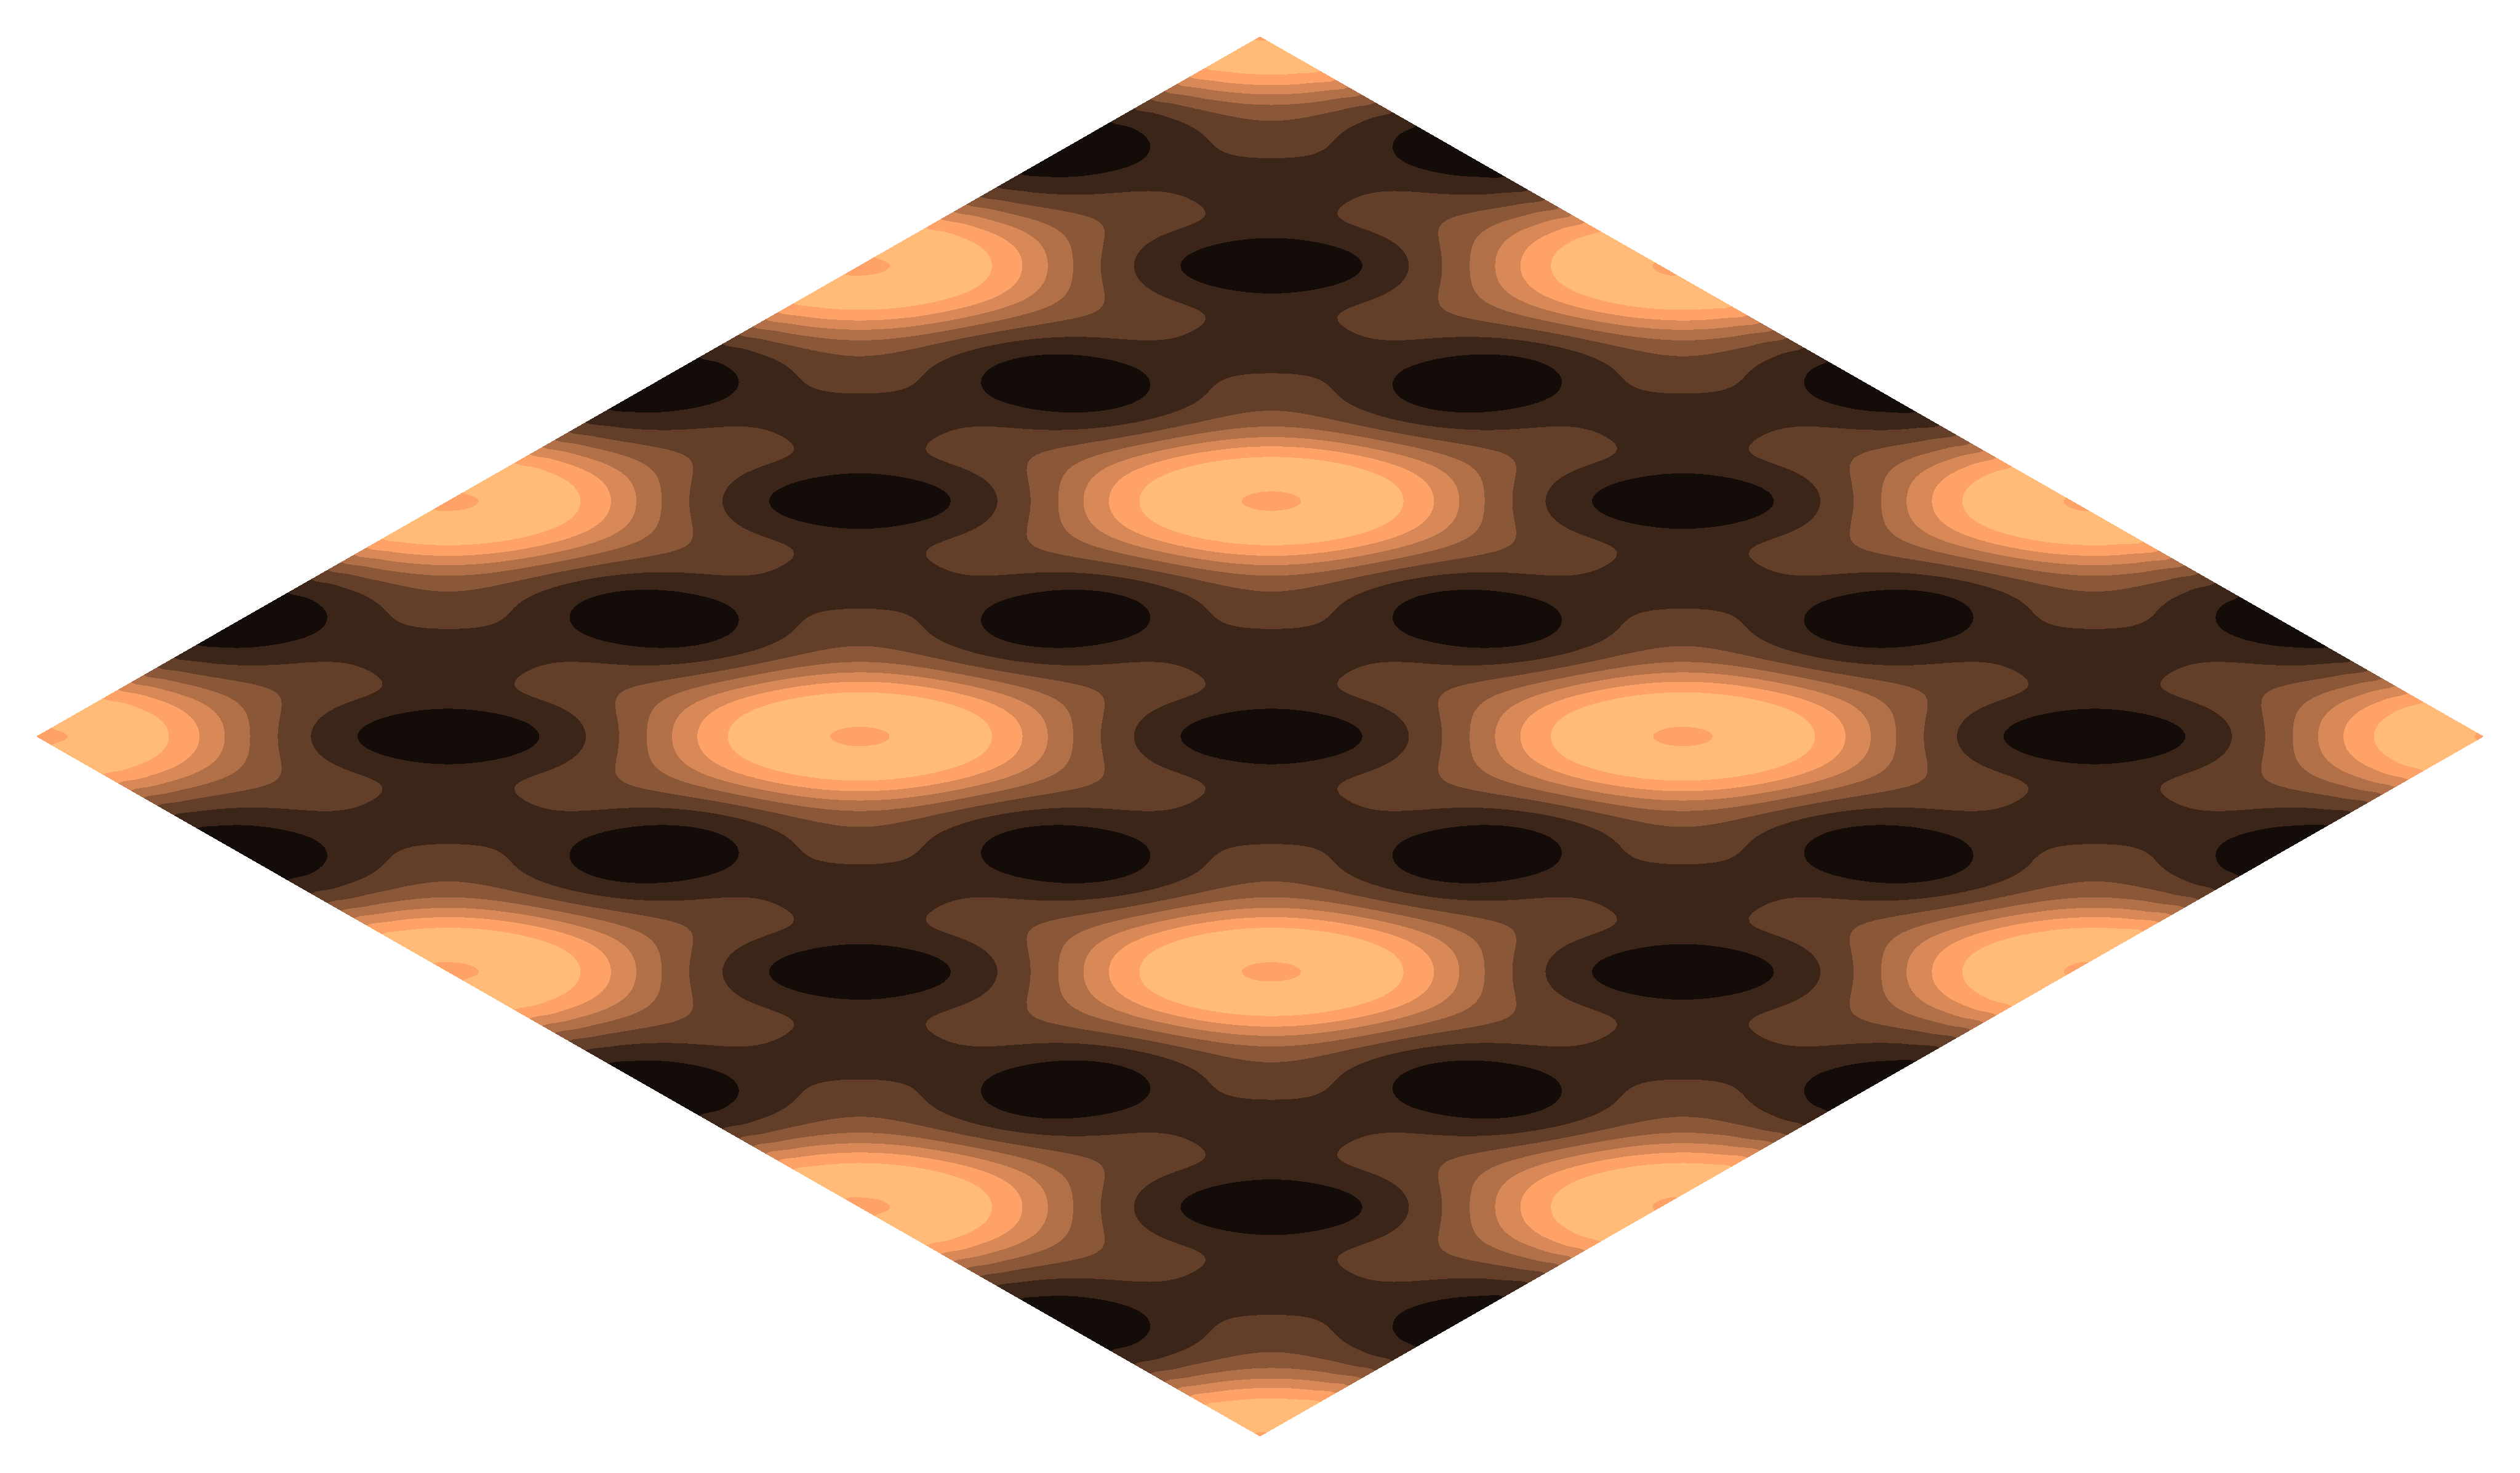

In [219]:
import scipy.ndimage
plt.figure(figsize=(2.137112*2*2,1.23*2*2),dpi=600)
data = scipy.ndimage.zoom(superdensity.sum(-1), 3)
plt.contourf(super_new_mesh[:,:,0],
               super_new_mesh[:,:,1],
               data,cmap="copper")
plt.xticks([])
plt.yticks([])
plt.box(False)


In [139]:
superdensity.shape

(72, 72, 280)

In [146]:
np.tile(np.arange(3),(2,2))

array([[0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2]])

In [140]:
superdensity = density.repeat(2, axis=0).repeat(2, axis=1).repeat(2, axis=2)

In [148]:
superdensity = np.tile(density,(2,2,1))

In [149]:
superdensity.shape

(72, 72, 140)

In [6]:
lis = ["1","2","3"]

In [9]:
import json

# Assuming `lis` is the string list
lis = ["1", "2", "3"]

# Convert the list to a JSON string
json_str = json.dumps(lis)

# Save the JSON string to a file
with open('list.json', 'w') as f:
    f.write(json_str)


In [6]:
dir(chgcar)

['REDIRECT',
 '__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get_pydantic_core_schema__',
 '__get_pydantic_json_schema__',
 '__get_validators__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__modify_schema__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_distance_matrix',
 '_generic_json_schema',
 '_spin_data',
 '_validate_monty',
 'as_dict',
 'copy',
 'data',
 'data_aug',
 'dim',
 'from_cube',
 'from_dict',
 'from_file',
 'from_hdf5',
 'get_average_along_axis',
 'get_axis_grid',
 'get_integrated_diff',
 'interpolator',
 'is_soc',
 'is_spin_polarized',
 'linear_add',
 'linear_slice',
 'name',
 'net_magnetization',
 'ngridpts',
 'parse_file',
 'poscar',
 'scale',
 'spin_data',
 'structure',
 'to_cube',
 'to_hdf5',
 'to_json',

In [7]:
chgcar.data

{'total': array([[[-7.67076006, -7.1419922 , -5.61016114, ..., -3.23090062,
          -5.61016363, -7.14199403],
         [-7.1419922 , -6.156923  , -4.28509713, ..., -4.28509663,
          -6.15692336, -7.14199245],
         [-5.61016114, -4.28509713, -2.2197689 , ..., -4.2850951 ,
          -5.61016021, -6.06671462],
         ...,
         [-3.23090062, -4.28509663, -4.2850951 , ...,  4.63176918,
           1.47426635, -1.23949527],
         [-5.61016363, -6.15692336, -5.61016021, ...,  1.47426635,
          -1.58378568, -4.0294018 ],
         [-7.14199403, -7.14199245, -6.06671462, ..., -1.23949527,
          -4.0294018 , -6.06671863]],
 
        [[-7.1419922 , -6.156923  , -4.28509713, ..., -4.28509663,
          -6.15692336, -7.14199245],
         [-6.156923  , -4.80235536, -2.69085658, ..., -4.8023526 ,
          -6.1569217 , -6.62362458],
         [-4.28509713, -2.69085658, -0.4890586 , ..., -4.28509339,
          -5.1219682 , -5.12196951],
         ...,
         [-4.28509663, -

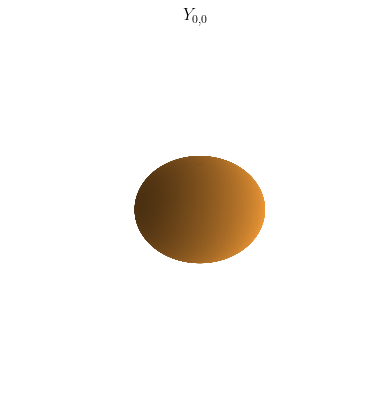

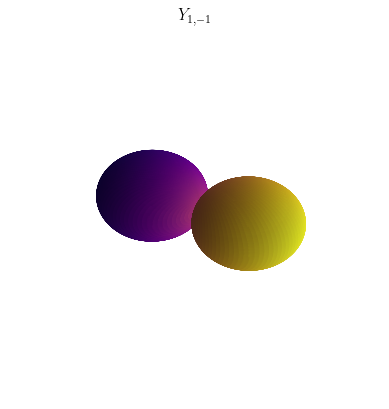

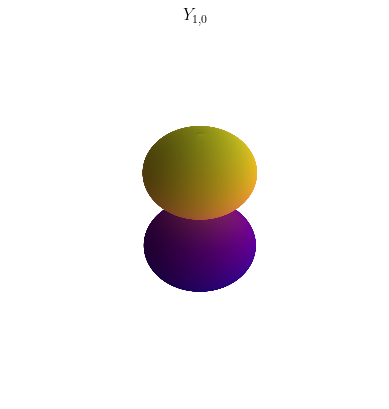

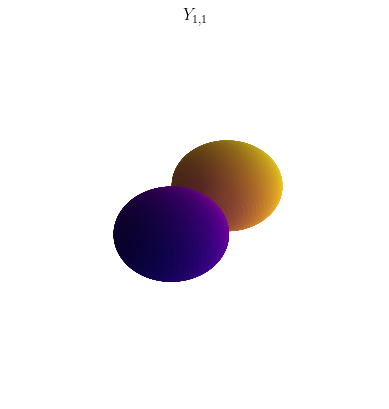

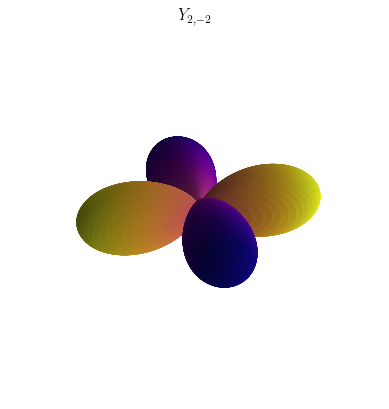

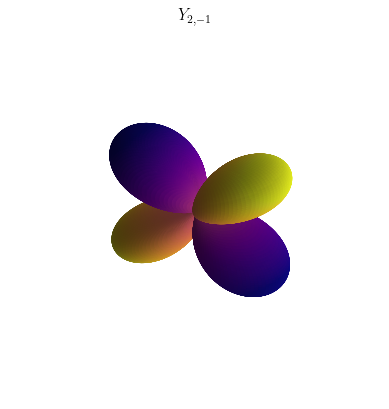

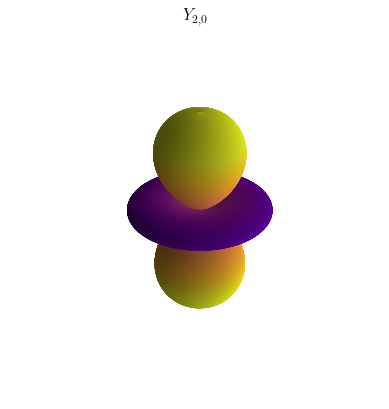

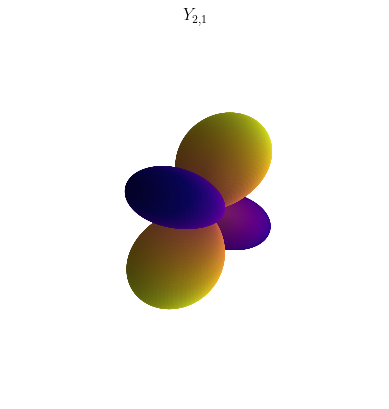

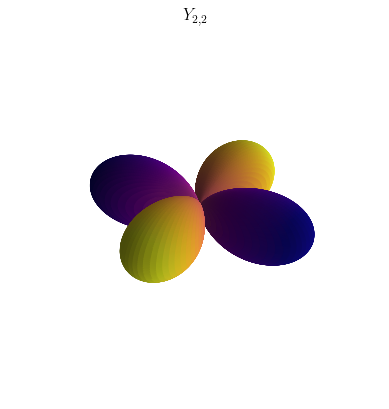

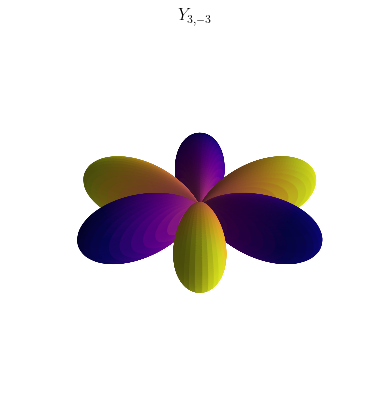

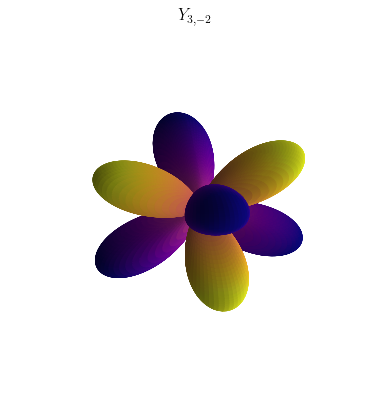

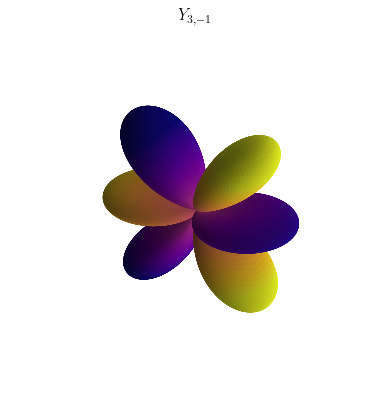

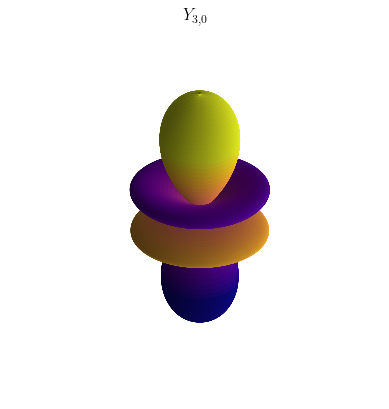

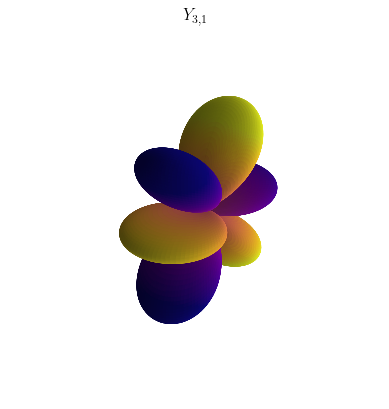

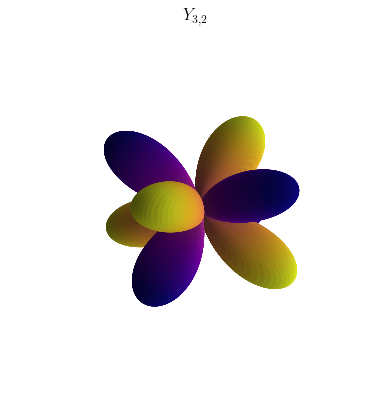

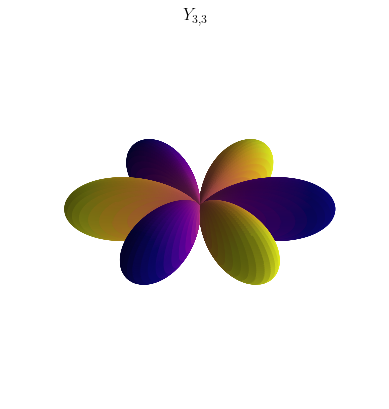

In [238]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# The following import configures Matplotlib for 3D plotting.
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
plt.rc('text', usetex=True)

# Grids of polar and azimuthal angles
theta = np.linspace(0, np.pi, 300)
phi = np.linspace(0, 2*np.pi, 300)
# Create a 2-D meshgrid of (theta, phi) angles.
theta, phi = np.meshgrid(theta, phi)
# Calculate the Cartesian coordinates of each point in the mesh.
xyz = np.array([np.sin(theta) * np.sin(phi),
                np.sin(theta) * np.cos(phi),
                np.cos(theta)])

def plot_Y(ax, el, m):
    """Plot the spherical harmonic of degree el and order m on Axes ax."""

    # NB In SciPy's sph_harm function the azimuthal coordinate, theta,
    # comes before the polar coordinate, phi.
    Y = sph_harm(abs(m), el, phi, theta)

    # Linear combination of Y_l,m and Y_l,-m to create the real form.
    if m < 0:
        Y = np.sqrt(2) * (-1)**m * Y.imag
    elif m > 0:
        Y = np.sqrt(2) * (-1)**m * Y.real
    Yx, Yy, Yz = np.abs(Y) * xyz

    # Colour the plotted surface according to the sign of Y.
    cmap = plt.cm.ScalarMappable(cmap=plt.get_cmap('plasma'))
    cmap.set_clim(-0.5, 0.5)

    ax.plot_surface(Yx, Yy, Yz,
                    facecolors=cmap.to_rgba(Y.real),
                    rstride=2, cstride=2)

    # Draw a set of x, y, z axes for reference.
    # ax_lim = 0.5
    # ax.plot([-ax_lim, ax_lim], [0,0], [0,0], c='0.5', lw=1, zorder=10)
    # ax.plot([0,0], [-ax_lim, ax_lim], [0,0], c='0.5', lw=1, zorder=10)
    # ax.plot([0,0], [0,0], [-ax_lim, ax_lim], c='0.5', lw=1, zorder=10)
    # Set the Axes limits and title, turn off the Axes frame.
    ax.set_title(r'$Y_{{{},{}}}$'.format(el, m))
    ax_lim = 0.5
    ax.set_xlim(-ax_lim, ax_lim)
    ax.set_ylim(-ax_lim, ax_lim)
    ax.set_zlim(-ax_lim, ax_lim)
    # ax.axis('off')

for i in range(4):
    l = i
    for j in range(2 * l + 1):
        m = j - l
        fig = plt.figure(figsize=plt.figaspect(1.))
        ax = fig.add_subplot(projection='3d')
        ax.set_axis_off()
        plot_Y(ax, l, m)
        plt.savefig('Y{}_{}.png'.format(l, m))
        plt.show()

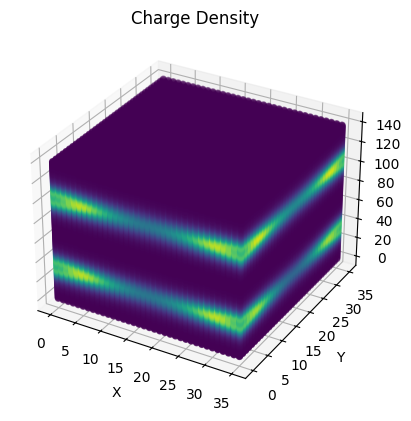

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming chgcar is the charge density data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the grid coordinates
x = range(chgcar.dim[0])
y = range(chgcar.dim[1])
z = range(chgcar.dim[2])
X, Y, Z = np.meshgrid(x, y, z)

# Plot the charge density
ax.scatter(X, Y, Z, c=chgcar.data["total"])

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Charge Density')

# Show the plot
plt.show()


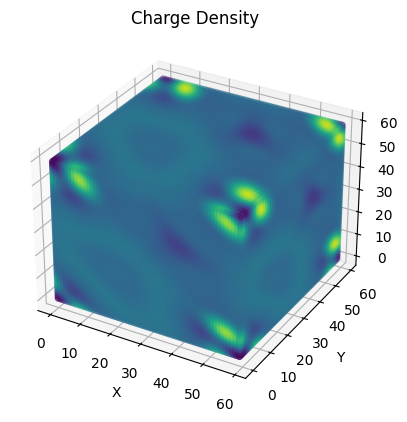

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming chgcar is the charge density data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the grid coordinates
x = range(chgcar.dim[0])
y = range(chgcar.dim[1])
z = range(chgcar.dim[2])
X, Y, Z = np.meshgrid(x, y, z)

# Plot the charge density
ax.scatter(X, Y, Z, c=chgcar.data["diff"])

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Charge Density')

# Show the plot
plt.show()


In [ ]:
# https://docs.materialsproject.org/downloading-data/using-the-api/tips-for-large-downloads

In [4]:
from mp_api.client import MPRester
from emmet.core.summary import HasProps

with MPRester(my_api_key) as mpr:
    docs = mpr.materials.summary.search(
        has_props = [HasProps.charge_density], fields=["material_id"], chunk_size=100
    )
    mpids = [doc.material_id for doc in docs]

MPRestError: HTTPSConnectionPool(host='api.materialsproject.org', port=443): Max retries exceeded with url: /materials/summary/?has_props=charge_density&_limit=100&_fields=material_id (Caused by ResponseError('too many 504 error responses'))

In [ ]:
import pickle

# Save mpids to a filempresterror: HTTPSConnectionPool(host='api.materialsproject.org', port=443): Max retries exceeded with url: /materials/summary/?has_props=charge_density&_limit=100&_fields=material_id&_skip=29500%20(Caused%20by%20ReadTimeoutError(%22HTTPSConnectionPool(host=%27api.materialsproject.org%27,%20port=443):%20Read%20timed%20out.%20(read%20timeout=20)%22))
with open('mpids.pkl', 'wb') as f:
    pickle.dump(mpids, f)


In [ ]:
path = "/home/holywater2/crystal/dataset_mp"
with MPRester(my_api_key) as mpr:
    for mp_id in mpids:
        chgcar = mpr.get_charge_density_from_material_id(mp_id)
        
        